<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



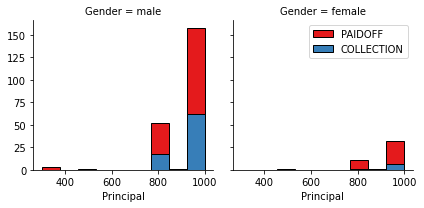

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

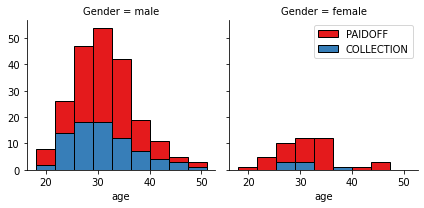

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


In [10]:
# df['effective_date'].dt.dayofweek
help(pd.Series.dt.dayofweek)

Help on property:

    The day of the week with Monday=0, Sunday=6.
    
    Return the day of the week. It is assumed the week starts on
    Monday, which is denoted by 0 and ends on Sunday which is denoted
    by 6. This method is available on both Series with datetime
    values (using the `dt` accessor) or DatetimeIndex.
    
    Returns
    -------
    Series or Index
        Containing integers indicating the day number.
    
    See Also
    --------
    Series.dt.dayofweek : Alias.
    Series.dt.weekday : Alias.
    Series.dt.day_name : Returns the name of the day of the week.
    
    Examples
    --------
    >>> s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
    >>> s.dt.dayofweek
    2016-12-31    5
    2017-01-01    6
    2017-01-02    0
    2017-01-03    1
    2017-01-04    2
    2017-01-05    3
    2017-01-06    4
    2017-01-07    5
    2017-01-08    6
    Freq: D, dtype: int64



In [11]:
t = pd.DataFrame({'day':['7/18/2022']})
t['day'] = pd.to_datetime(t['day'])
t['day'].dt.day_name()

0    Monday
Name: day, dtype: object

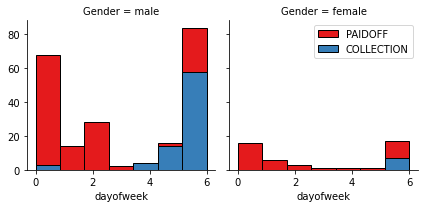

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame


In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le_status = LabelEncoder()
df['loan_status'] = le_status.fit_transform(df['loan_status'])

In [22]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score, jaccard_score

In [25]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2, random_state=0)

In [26]:
neighbors = [i+1 for i in range(20)]
N = None
score = 0

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    s = f1_score(y_pred, y_test, average='weighted')
    print(f'for {n} neighbors, fi_score: {s:.4f}')
    if s > score:
        score = s
        N = n
print(f'\n\nOur best value for K is {N} with f1_score: {score:.4f}')

for 1 neighbors, fi_score: 0.6470
for 2 neighbors, fi_score: 0.5247
for 3 neighbors, fi_score: 0.6953
for 4 neighbors, fi_score: 0.6404
for 5 neighbors, fi_score: 0.6990
for 6 neighbors, fi_score: 0.6629
for 7 neighbors, fi_score: 0.7533
for 8 neighbors, fi_score: 0.7066
for 9 neighbors, fi_score: 0.7469
for 10 neighbors, fi_score: 0.6581
for 11 neighbors, fi_score: 0.7646
for 12 neighbors, fi_score: 0.7592
for 13 neighbors, fi_score: 0.8000
for 14 neighbors, fi_score: 0.7469
for 15 neighbors, fi_score: 0.8349
for 16 neighbors, fi_score: 0.7767
for 17 neighbors, fi_score: 0.8167
for 18 neighbors, fi_score: 0.8114
for 19 neighbors, fi_score: 0.7799
for 20 neighbors, fi_score: 0.7533


Our best value for K is 15 with f1_score: 0.8349


I tested with up to k = 100 and for k = 49 gave about 0.9 f1_ score, but I think I'll stick to the safer k = 15 for now

In [27]:
# we can now train on the entire training set
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

# Decision Tree


In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [29]:
D = [i+1 for i in range(10)]
depth = None
score = 0

for d in D:
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    s = f1_score(y_pred, y_test, average='weighted')
    print(f'depth {d} has f1 score {s:.4f}')
    if score < s:
        score = s
        depth = d

print(f'The best tree has a depth of {depth} with f1 score: {score:.4f}')

depth 1 has f1 score 0.9062
depth 2 has f1 score 0.9062
depth 3 has f1 score 0.9062
depth 4 has f1 score 0.6857
depth 5 has f1 score 0.8074
depth 6 has f1 score 0.7030
depth 7 has f1 score 0.7291
depth 8 has f1 score 0.7030
depth 9 has f1 score 0.7066
depth 10 has f1 score 0.6270
The best tree has a depth of 1 with f1 score: 0.9062


In [30]:
tree_D = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_D.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

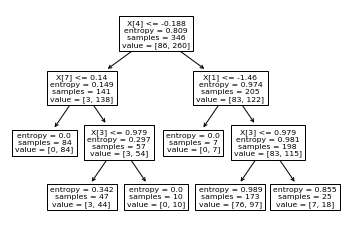

In [31]:
plot_tree(tree_D)
plt.show()

# Support Vector Machine


In [32]:
from sklearn.svm import SVC

In [33]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

kb = None
score = 0

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    s = f1_score(y_pred, y_test, average='weighted')
    print(f'{kernel} kernel gives f1 score: {s:.4f}')
    if score < s:
        score = s
        kb = kernel
        
print(f'\n\nThe best kernel is {kb} with f1 score: {score:.4f}')

linear kernel gives f1 score: 0.9062
poly kernel gives f1 score: 0.8635
rbf kernel gives f1 score: 0.7143
sigmoid kernel gives f1 score: 0.8830


The best kernel is linear with f1 score: 0.9062


The Linear kernel gives the best result

In [34]:
svm_C = SVC(kernel='linear')
svm_C.fit(X, y)

SVC(kernel='linear')

# Logistic Regression


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
solvers = ["newton-cg", "sag", "lbfgs", "liblinear"]
Cs = np.linspace(0.01, 1, 10)
best_score = 0
best_solver = None
best_C = None

hist = {}

for solver in solvers:
    scores = []
    for C in Cs:
        regr = LogisticRegression(C=C, solver=solver)
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        score = f1_score(y_pred, y_test, average='weighted')
        if score > best_score:
            best_score = score
            best_solver = solver
            best_C = C
        scores.append(score)
        
    hist[solver] = scores
    
print(f'The best combination of solver and regularisation are {best_solver} and {best_C} with f1 score: {best_score:.4f}')

The best combination of solver and regularisation are liblinear and 0.34 with f1 score: 0.9177


Let's visualize 

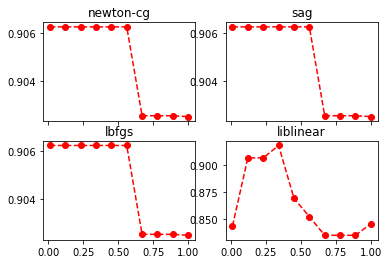

In [37]:
fig, axes = plt.subplots(2, 2, sharex='col')
for ax, solver in zip(axes.flatten(), solvers):
    ax.plot(Cs, hist[solver], 'r--o')
    ax.set_title(solver)

Now lets train our model on the entire training set using 'liblinear' solver and 0.34 regularization

In [38]:
regr_R = LogisticRegression(C=0.34, solver='liblinear')
regr_R.fit(X, y)

LogisticRegression(C=0.34, solver='liblinear')

In [39]:
# break
X[:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Model Evaluation using Test set


In [40]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


My models are

    KNN: knn_15
    Decision Tree: tree_D
    SVM: svm_C
    Logistic Regression:regr_R

First, download and load the test set:


In [41]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load Test set for evaluation


In [42]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [43]:
test_df.shape

(54, 10)

In [44]:
test_df['Gender'].replace(('male', 'female'), (0, 1), inplace=True)

In [45]:
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,1
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,0
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,1
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,0
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,0


In [46]:
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['due_data'] = pd.to_datetime(test_df['due_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda a: 1 if (a>3) else 0)

test_df['loan_status'] = le_status.fit_transform(test_df['loan_status'])

test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,due_data,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,10/7/2016,50,Bechalor,1,2016-10-07,3,0
1,5,5,1,300,7,2016-09-09,9/15/2016,35,Master or Above,0,2016-09-15,4,1
2,21,21,1,1000,30,2016-09-10,10/9/2016,43,High School or Below,1,2016-10-09,5,1
3,24,24,1,1000,30,2016-09-10,10/9/2016,26,college,0,2016-10-09,5,1
4,35,35,1,800,15,2016-09-11,9/25/2016,29,Bechalor,0,2016-09-25,6,1


In [47]:
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [48]:
x_t = test_feature
x_t = preprocessing.StandardScaler().fit(x_t).transform(x_t)
y_t = test_df['loan_status'].values

In [49]:
test_df['loan_status'].value_counts()

1    40
0    14
Name: loan_status, dtype: int64

In [50]:
knn_pred = knn_15.predict(x_t)
tree_pred = tree_D.predict(x_t)
svm_pred = svm_C.predict(x_t)
reg_pred = regr_R.predict(x_t)

# For calculating log-loss
reg_prob = regr_R.predict_proba(x_t)

In [51]:
models = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
predictions = [knn_pred, tree_pred, svm_pred, reg_pred]
dataframe = {}

for model, prediction in zip(models, predictions):
    data = []
    data.append(jaccard_score(y_t, prediction, pos_label=1))
    data.append(f1_score(y_t, prediction, average='weighted'))
    if model == 'Logistic Regression':
        data.append(log_loss(y_t, reg_prob))
    else:
        data.append(None)
        
    dataframe[model] = data

In [53]:
report = pd.DataFrame(dataframe, index=['Jaccard', 'F1-score', 'Log-Loss'])
report.transpose()

,Jaccard,F1-score,Log-Loss
KNN,0.705882,0.687101,NaN
Decision Tree,0.740741,0.630418,NaN
SVM,0.740741,0.630418,NaN
Logistic Regression,0.754717,0.671764,0.47581


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
